In [1]:
using LinearAlgebra, Plots, FFTW

In [2]:
function chebfft(f)
    n = length(f)-1
    x = cos.((0:n)*π/n) # Chebyshev points
    ii = 0:n-1
    q = [f; f[n:-1:2]]      # transform x -> θ    
    # differentiate the interpolant qₙ in coefficient space and map back to function values
    cq = real.(fft(q))
    dq = real.(ifft(im*[ii; 0; 1-n:-1] .*cq))
    df = zeros(n+1,1)
    # Compute approximations to f' at the interior points
    df[2:n] = -dq[2:n] ./sqrt.(1 .- x[2:n].^2)    # transform θ -> x   
    # At the boundary points
    df[1] = sum(ii.^2 .*cq[1:n])/n + .5*n*cq[n+1]     
    df[n+1] = sum((-1) .^(ii .+1) .* ii.^2 .*cq[1:n])/n +
              .5*(-1)^(n+1)*n*cq[n+1]
    df
end

chebfft (generic function with 1 method)

In [ ]:
N = 80; x = cos(pi*(0:N)/N); dt = 8/N^2;
  v = exp(-200*x.^2); vold = exp(-200*(x-dt).^2);
  tmax = 4; tplot = .075; 
  plotgap = round(tplot/dt); dt = tplot/plotgap;
  nplots = round(tmax/tplot);
  plotdata = [v; zeros(nplots,N+1)]; tdata = 0;

In [5]:
N = 80; x = cos.(pi*(0:N)/N); dt = 8/N^2;
v = exp.(-200*x.^2); vold = exp.(-200*(x.-dt).^2);
tmax = 4; tplot = .075; 
  plotgap = round(tplot/dt); dt = tplot/plotgap;
  nplots = round(tmax/tplot);
  plotdata = [v; zeros(nplots,N+1)]; tdata = 0;

In [6]:
N = 80; x = cos.(π*(0:N)/N); dt = 8/N^2;
v = exp.(-200*x.^2); vold = exp.(-200*(x.-dt).^2);
tmax = 4; tplot = .075;

In [ ]:
# Time-stepping by leap frog formula:
  N = 80; x = cos(pi*(0:N)/N); dt = 8/N^2;
  v = exp(-200*x.^2); vold = exp(-200*(x-dt).^2);
  tmax = 4; tplot = .075; 
  plotgap = round(tplot/dt); dt = tplot/plotgap;
  nplots = round(tmax/tplot);
  plotdata = [v; zeros(nplots,N+1)]; tdata = 0;
  clf, drawnow, h = waitbar(0,'please wait...');
  set(gcf,'renderer','zbuffer')
  
  M = 2;
  [x, DM] = chebdif(N+1, M);
  D2 = DM(2:N,2:N,2);
  
  tic
  for i = 1:nplots, waitbar(i/nplots)
    for n = 1:plotgap
        % FFT
      w = chebfft(chebfft(v))'; w(1) = 0; w(N+1) = 0;
      vnew = 2*v - vold + dt^2*w; vold = v; v = vnew;
      % Differentiation matrix
      %vnew = 2*v - vold + [0, dt^2*(D2*v(2:end-1)')', 0]; vold = v; v = vnew;
    end
    plotdata(i+1,:) = v; tdata = [tdata; dt*i*plotgap];
  end
  toc

In [20]:
N = 80; x = cos.(π*(0:N)/N); dt = 8/N^2;
v = exp.(-200*x.^2);vold = exp.(-200*(x .- dt).^2)
tmax = 4; tplot = 0.03;
plotgap = Int64(round(tplot/dt)); dt = tplot/plotgap;
nplots = Int64(round(tmax/tplot))
plotdata = [transpose(v); zeros(nplots,N+1)]; tdata = [0.0];
for i = 1:nplots
    for n = 1:plotgap
        w = chebfft(chebfft(v)); w[1]=0; w[N+1] = 0;
        vnew = 2*v - vold + dt^2*w; vold = v; v = vnew;
    end
    plotdata[i+1,:] = v; tdata = [tdata;dt*i*plotgap]
end

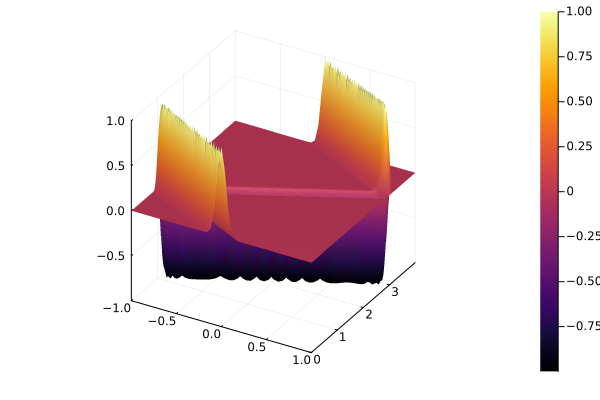

In [21]:
surface(x,tdata,plotdata)

In [22]:
global(v)

In [23]:
global v

In [24]:
v

81×1 Matrix{Float64}:
 -2.862000361350991e-84
 -1.5175751491505686e-6
 -3.1814290943264076e-6
 -6.387968622386636e-6
 -1.0315153952732424e-5
 -1.1947282259906216e-5
 -1.0756863190298017e-5
 -2.9174994914706136e-6
  6.286209895402158e-6
  1.1080143656463618e-5
  5.8493948896655644e-6
 -4.729858717208664e-6
 -1.113225313276162e-5
  ⋮
  5.3875285212409654e-5
 -5.349346451982578e-6
 -5.3535534301747914e-5
 -4.178921333192933e-5
  5.08038121825647e-6
  4.256919737766014e-5
  5.572285030332275e-5
  4.6731380532644095e-5
  2.9936583783941997e-5
  1.3658707498713458e-5
  2.7737787557413433e-6
  1.7403316070060478e-84